In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K

In [3]:
df = pd.read_csv("data/flattened_data.csv", index_col = "datetime")
df.head()

,1INCHBUSD_open,1INCHBUSD_high,1INCHBUSD_low,1INCHBUSD_close,1INCHBUSD_volume,1INCHUSD_open,1INCHUSD_high,1INCHUSD_low,1INCHUSD_close,1INCHUSD_volume,...,ZRXBUSD_open,ZRXBUSD_high,ZRXBUSD_low,ZRXBUSD_close,ZRXBUSD_volume,ZRXUSD_open,ZRXUSD_high,ZRXUSD_low,ZRXUSD_close,ZRXUSD_volume
datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,2.410,2.450,2.406,2.429,27034.1,2.39,2.42,2.39,2.42,47726.30,...,0.8225,0.8375,0.8225,0.8349,2957.0,0.803274,0.815819,0.803274,0.815819,124094.48027
2022-01-01 01:00:00,2.434,2.441,2.421,2.424,15641.5,2.42,2.44,2.41,2.44,109643.15,...,0.8367,0.8367,0.8262,0.8262,7690.0,0.815761,0.818488,0.812232,0.816939,430003.38704
2022-01-01 02:00:00,2.423,2.444,2.418,2.434,10500.5,2.43,2.45,2.43,2.44,22534.85,...,0.8249,0.8305,0.8249,0.8296,1352.0,0.817332,0.841967,0.816370,0.825341,545121.67633
2022-01-01 03:00:00,2.433,2.449,2.433,2.435,11621.9,2.43,2.45,2.43,2.43,16066.99,...,0.8310,0.8327,0.8271,0.8271,5814.0,0.825479,0.826189,0.819242,0.821205,174704.12975
2022-01-01 04:00:00,2.436,2.454,2.415,2.428,18122.9,2.42,2.43,2.40,2.40,35143.16,...,0.8262,0.8326,0.8239,0.8326,4731.0,0.822383,0.824401,0.814999,0.821184,109516.28991


In [4]:
## split the dataset into 70:15:15
last_15 = sorted(df.index.values)[-int(0.15*len(df))] # Last 15% indices
last_30 = sorted(df.index.values)[-int(0.3*len(df))] 

train_data = df[(df.index < last_30)].values
val_data = df[(df.index >= last_30) & (df.index < last_15)].values
test_data = df[(df.index >= last_15)].values

print('Training set shape: {}'.format(train_data.shape))
print('Validation set shape: {}'.format(val_data.shape))
print('Test data set: {}'.format(test_data.shape))
# standardize the dataset
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
val_data = scaler.transform(val_data)
test_data = scaler.transform(test_data)
# reshape the data with to window size
seq_len = 30

def reshape_data(seq_len, data):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[:][i])
    X, y = np.array(X), np.array(y)
    return X, y

X_train, y_train = reshape_data(seq_len, train_data)
X_val, y_val = reshape_data(seq_len, val_data)
X_test, y_test = reshape_data(seq_len, test_data)

print('Training set shape', X_train.shape, y_train.shape)
print('Validation set shape', X_val.shape, y_val.shape)
print('Testing set shape' ,X_test.shape, y_test.shape)

Training set shape: (2537, 1955)
Validation set shape: (544, 1955)
Test data set: (543, 1955)
Training set shape (2507, 30, 1955) (2507, 1955)
Validation set shape (514, 30, 1955) (514, 1955)
Testing set shape (513, 30, 1955) (513, 1955)


In [6]:
profit = 0
x_test_last = X_test[:, -1, :]

# TODO, trading decisions - profit
print(x_test_last.shape)
x_test_last_close = []
y_test_close = []
y_test_pred_close = []
for i in range(x_test_last.shape[1]):
    if i%5 == 3:
        x_test_last_close.append(x_test_last[:,i])
        y_test_close.append(y_test[:,i])
        # y_test_pred_close.append(y_test_pred[:,i])
x_test_last_close = np.transpose(np.array(x_test_last_close))
y_test_close = np.transpose(np.array(y_test_close))
# y_test_pred_close = np.transpose(np.array(y_test_pred_close))
print(x_test_last_close.shape)
print(y_test_close.shape)
# print(y_test_pred_close.shape)


for i in range(x_test_last_close.shape[0]):
    for j in range(x_test_last_close.shape[1]):
        if x_test_last_close[i,j] != 0:
            profit = profit - 1000 + 1000*(y_test_close[i, j]/x_test_last_close[i,j])
print(profit)

(513, 1955)
(513, 391)
(513, 391)
-491293.0070585426


In [7]:
d_k = 128
d_v = 128
n_heads = 8
ff_dim = 128
batch_size = 64

In [8]:
class T2V(Layer):
    def __init__(self, output_dim=None, **kwargs):
        self.output_dim = output_dim
        super(T2V, self).__init__(**kwargs)
        
    def build(self, input_shape):
        self.W = self.add_weight(name='W',
                      shape=(input_shape[-1], self.output_dim),
                      initializer='uniform',
                      trainable=True)
        self.P = self.add_weight(name='P',
                      shape=(input_shape[1], self.output_dim),
                      initializer='uniform',
                      trainable=True)
        self.w = self.add_weight(name='w',
                      shape=(input_shape[1], 1),
                      initializer='uniform',
                      trainable=True)
        self.p = self.add_weight(name='p',
                      shape=(input_shape[1], 1),
                      initializer='uniform',
                      trainable=True)
        super(T2V, self).build(input_shape)
        
    def call(self, x):
        original = self.w * x + self.p
        sin_trans = K.sin(K.dot(x, self.W) + self.P)
        
        return K.concatenate([sin_trans, original], -1)
    
    def get_config(self): # Needed for saving and loading model with custom layer
        config = super().get_config().copy()
        config.update({'output_dim': self.output_dim})
        return config

In [9]:
class SingleAttention(Layer):
    def __init__(self, d_k, d_v):
        super(SingleAttention, self).__init__()
        self.d_k = d_k
        self.d_v = d_v

    def build(self, input_shape):
        self.query = Dense(self.d_k, input_shape=input_shape, kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')
        self.key = Dense(self.d_k, input_shape=input_shape, kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')
        self.value = Dense(self.d_v, input_shape=input_shape, kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')
    
    def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
        q = self.query(inputs[0])
        k = self.key(inputs[1])

        attn_weights = tf.matmul(q, k, transpose_b=True)
        attn_weights = tf.map_fn(lambda x: x/np.sqrt(self.d_k), attn_weights)
        attn_weights = tf.nn.softmax(attn_weights, axis=-1)
    
        v = self.value(inputs[2])
        attn_out = tf.matmul(attn_weights, v)
        return attn_out  

In [10]:
class MultiAttention(Layer):
    def __init__(self, d_k, d_v, n_heads):
        super(MultiAttention, self).__init__()
        self.d_k = d_k
        self.d_v = d_v
        self.n_heads = n_heads
        self.attn_heads = list()
    
    def build(self, input_shape):
        for n in range(self.n_heads):
            self.attn_heads.append(SingleAttention(self.d_k, self.d_v))
            self.linear = Dense(input_shape[0][-1], input_shape=input_shape, kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')
    
    def call(self, inputs):
        attn = [self.attn_heads[i](inputs) for i in range(self.n_heads)]
        concat_attn = tf.concat(attn, axis=-1)
        multi_linear = self.linear(concat_attn)
        return multi_linear 

In [11]:
class TransformerEncoder(Layer):
    def __init__(self, d_k, d_v, n_heads, ff_dim, dropout=0.1, **kwargs):
        super(TransformerEncoder, self).__init__()
        self.d_k = d_k
        self.d_v = d_v
        self.n_heads = n_heads
        self.ff_dim = ff_dim
        self.attn_heads = list()
        self.dropout_rate = dropout

    def build(self, input_shape):
        self.attn_multi = MultiAttention(self.d_k, self.d_v, self.n_heads)
        self.attn_dropout = Dropout(self.dropout_rate)
        self.attn_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)

        self.ff_conv1D_1 = Conv1D(filters=self.ff_dim, kernel_size=1, activation='relu')
        # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1] = 7 
        self.ff_conv1D_2 = Conv1D(filters=input_shape[0][-1], kernel_size=1) 
        self.ff_dropout = Dropout(self.dropout_rate)
        self.ff_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)    
  
    def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
        attn_layer = self.attn_multi(inputs)
        attn_layer = self.attn_dropout(attn_layer)
        attn_layer = self.attn_normalize(inputs[0] + attn_layer)

        ff_layer = self.ff_conv1D_1(attn_layer)
        ff_layer = self.ff_conv1D_2(ff_layer)
        ff_layer = self.ff_dropout(ff_layer)
        ff_layer = self.ff_normalize(inputs[0] + ff_layer)
        return ff_layer 

    def get_config(self): # Needed for saving and loading model with custom layer
        config = super().get_config().copy()
        config.update({'d_k': self.d_k,
                       'd_v': self.d_v,
                       'n_heads': self.n_heads,
                       'ff_dim': self.ff_dim,
                       'attn_heads': self.attn_heads,
                       'dropout_rate': self.dropout_rate})
        return config      

In [12]:
def create_model():
    '''Initialize time and transformer layers'''
    time_embedding = T2V(seq_len)
    attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
    attn_layer2 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
    attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)

    '''Construct model'''
    in_seq = Input(shape=(seq_len, 1955))
    x = time_embedding(in_seq)
    x = Concatenate(axis=-1)([in_seq, x])
    x = attn_layer1((x, x, x))
    x = attn_layer2((x, x, x))
    x = attn_layer3((x, x, x))
    x = GlobalAveragePooling1D(data_format='channels_first')(x)
    x = Dropout(0.15)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.15)(x)
    out = Dense(1955)(x)

    model = Model(inputs=in_seq, outputs=out)
    model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])
    return model

In [13]:
model = create_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30, 1955)]   0                                            
__________________________________________________________________________________________________
t2v (T2V)                       (None, 30, 1985)     59610       input_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 30, 3940)     0           input_1[0][0]                    
                                                                 t2v[0][0]                        
__________________________________________________________________________________________________
transformer_encoder (Transforme (None, 30, 3940)     17173720    concatenate[0][0]            

In [14]:
callback = tf.keras.callbacks.ModelCheckpoint('Transformer+TimeEmbedding.hdf5', 
                                              monitor='val_loss', 
                                              save_best_only=True, verbose=1)

In [15]:
history = model.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=10, 
                    callbacks=[callback],
                    validation_data=(X_val, y_val))

Epoch 1/10
40/40 [==============================] - 95s 2s/step - loss: 0.1049 - mae: 0.2351 - mse: 0.1049 - val_loss: 0.0630 - val_mae: 0.1941 - val_mse: 0.0630

Epoch 00001: val_loss improved from inf to 0.06303, saving model to Transformer+TimeEmbedding.hdf5
Epoch 2/10
40/40 [==============================] - 82s 2s/step - loss: 0.0323 - mae: 0.1315 - mse: 0.0323 - val_loss: 0.0388 - val_mae: 0.1336 - val_mse: 0.0388

Epoch 00002: val_loss improved from 0.06303 to 0.03884, saving model to Transformer+TimeEmbedding.hdf5
Epoch 3/10
40/40 [==============================] - 81s 2s/step - loss: 0.0202 - mae: 0.1014 - mse: 0.0202 - val_loss: 0.0361 - val_mae: 0.1252 - val_mse: 0.0361

Epoch 00003: val_loss improved from 0.03884 to 0.03611, saving model to Transformer+TimeEmbedding.hdf5
Epoch 4/10
40/40 [==============================] - 81s 2s/step - loss: 0.0151 - mae: 0.0856 - mse: 0.0151 - val_loss: 0.0323 - val_mae: 0.1177 - val_mse: 0.0323

Epoch 00004: val_loss improved from 0.03611

In [29]:
model = tf.keras.models.load_model('Transformer+TimeEmbedding.hdf5',
                                   custom_objects={'T2V': T2V,
                                                   'SingleAttention': SingleAttention,
                                                   'MultiAttention': MultiAttention,
                                                   'TransformerEncoder': TransformerEncoder})

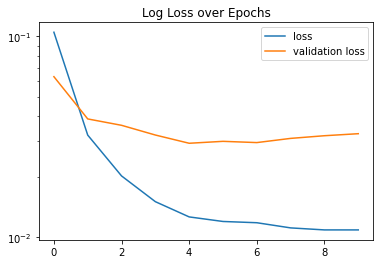

In [31]:
import matplotlib.pyplot as plt
plt.yscale('log')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Log Loss over Epochs')

plt.legend(['loss', 'validation loss'])

In [33]:
model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)

[4.284448623657227, 0.36135610938072205, 4.284448623657227]

In [35]:
from sklearn.metrics import r2_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [36]:
print(y_train_pred.shape, y_test_pred.shape)

(2507, 1955) (513, 1955)


In [37]:
from sklearn.metrics import r2_score
r2_array = []
for i in range(y_test.shape[1]):
    r2_array.append(r2_score(np.array(y_test[:, i]), np.array(y_test_pred[:, i])))

In [41]:
print('mean value of the r2 array:', np.mean(r2_array))
print('median value of the r2 array:', np.median(r2_array))

mean value of the r2 array: -116.49601394106007
median value of the r2 array: -84.72204589342324


In [43]:
profit = 0
X_test_last = X_test[:, -1, :]

# TODO, trading decisions - profit
print(X_test_last.shape)
X_test_last_close = []
y_test_close = []
y_test_pred_close = []
for i in range(X_test_last.shape[1]):
    if i%5 == 3:
        X_test_last_close.append(X_test_last[:,i])
        y_test_close.append(y_test[:,i])
        y_test_pred_close.append(y_test_pred[:,i])
X_test_last_close = np.transpose(np.array(X_test_last_close))
y_test_close = np.transpose(np.array(y_test_close))
y_test_pred_close = np.transpose(np.array(y_test_pred_close))
print(x_test_last_close.shape)
print(y_test_close.shape)
print(y_test_pred_close.shape)


for i in range(X_test_last_close.shape[0]):
    for j in range(X_test_last_close.shape[1]):
        if X_test_last_close[i,j] != 0 and y_test_pred_close[i, j] > X_test_last_close[i, j]:
            profit = profit - 1000 + 1000*(y_test_close[i, j]/X_test_last_close[i,j])
print(profit)

(513, 1955)
(513, 391)
(513, 391)
(513, 391)
-358286.2365630365


baseline profit: -491293.0070585426